Data was obtained from the UC Irivine Machine Learning Respository

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Loading the data and some EDA

In [2]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [3]:
df = pd.read_csv("Obesity Data.csv")

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

From the summary of the data, there are no null values. With the nature of the data I'm working with, there's not necessarily any duplicates. No identifiers to check for duplicates 

The summary of the data also shows a mix of data types I'm working with 

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Mix of data types so there are only statistics available for the numerical variables

From the numerical variables, I'm able to make out a few trends. There is a good age range available, 14-61 years old but with the mean being 24, we have more data of those who fall on the younger end . There's a pretty big range for weight as well of 39-173 kg. 

Renaming my columns so it's easier to understand what each column holds

In [9]:
df.rename(columns = {'family_history_with_overweight': 'FamilyHistory', 'FAVC':'HighCalorieFoods', 'FCVC': 'NumVeggies', 'NCP': 'NumMeals', 'CAEC': 'Snacks', 'SMOKE':'Smoke', 'CH2O': 'Water', 'SCC': 'MonitorCalories', 'FAF': 'PhyscialActivity', 'TUE': 'TechnologyUse', 'CALC': 'AlcoholUse', 'MTRANS': 'TransportationMode', 'NObeyesdad': 'Outcome'}, inplace=True)

In [10]:
df

,Gender,Age,Height,Weight,FamilyHistory,HighCalorieFoods,NumVeggies,NumMeals,Snacks,Smoke,Water,MonitorCalories,PhyscialActivity,TechnologyUse,AlcoholUse,TransportationMode,Outcome
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
df.describe()

,Age,Height,Weight,NumVeggies,NumMeals,Water,PhyscialActivity,TechnologyUse
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


It'll be easier to work with all numerical data rather than a mix of numerical and categorical so I'll change the categorial variables into numerical variables

In [12]:
df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [13]:
df['FamilyHistory'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [14]:
df['HighCalorieFoods'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [15]:
df['Snacks'].replace(['no', 'Sometimes', 'Frequently', 'Always'],
                        [0, 1, 2, 3], inplace=True)

In [16]:
df['Smoke'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [17]:
df['MonitorCalories'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

In [18]:
df['AlcoholUse'].replace(['no', 'Sometimes', 'Frequently', 'Always'],
                        [0, 1, 2, 3], inplace=True)

In [19]:
df['TransportationMode'].replace(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'],
                        [0, 1, 2, 3, 4], inplace=True)

In [20]:
df['Outcome'].replace(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I','Obesity_Type_II', 'Obesity_Type_III', "Overweight_Level_I", "Overweight_Level_II" ],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)

Looking at the data now with numerical values for all varaibles

In [21]:
df

,Gender,Age,Height,Weight,FamilyHistory,HighCalorieFoods,NumVeggies,NumMeals,Snacks,Smoke,Water,MonitorCalories,PhyscialActivity,TechnologyUse,AlcoholUse,TransportationMode,Outcome
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1,5
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,4
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,4
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,4
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,4


Looking at the summary of the data again to ensure the conversion of categorical variables to numerical variables 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              2111 non-null   int64  
 1   Age                 2111 non-null   float64
 2   Height              2111 non-null   float64
 3   Weight              2111 non-null   float64
 4   FamilyHistory       2111 non-null   int64  
 5   HighCalorieFoods    2111 non-null   int64  
 6   NumVeggies          2111 non-null   float64
 7   NumMeals            2111 non-null   float64
 8   Snacks              2111 non-null   int64  
 9   Smoke               2111 non-null   int64  
 10  Water               2111 non-null   float64
 11  MonitorCalories     2111 non-null   int64  
 12  PhyscialActivity    2111 non-null   float64
 13  TechnologyUse       2111 non-null   float64
 14  AlcoholUse          2111 non-null   int64  
 15  TransportationMode  2111 non-null   int64  
 16  Outcom

Normalizing the data other than the outcome variable

https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [23]:
df_normal = df.copy()

In [24]:
cols = df_normal.columns
target_col = "Outcome"
feat_cols = [c for c in cols if c != target_col]

In [25]:
for column in feat_cols:
    df_normal[column] = (df_normal[column] - df_normal[column].min()) / (df_normal[column].max() - df_normal[column].min())
    
print(df_normal)

      Gender       Age    Height    Weight  FamilyHistory  HighCalorieFoods  \
0        1.0  0.148936  0.320755  0.186567            1.0               0.0   
1        1.0  0.148936  0.132075  0.126866            1.0               0.0   
2        0.0  0.191489  0.660377  0.283582            1.0               0.0   
3        0.0  0.276596  0.660377  0.358209            0.0               0.0   
4        0.0  0.170213  0.622642  0.379104            0.0               0.0   
...      ...       ...       ...       ...            ...               ...   
2106     1.0  0.148443  0.491943  0.689616            1.0               1.0   
2107     1.0  0.169850  0.563366  0.707037            1.0               1.0   
2108     1.0  0.181362  0.570200  0.706637            1.0               1.0   
2109     1.0  0.220467  0.546132  0.704079            1.0               1.0   
2110     1.0  0.205632  0.544974  0.705020            1.0               1.0   

      NumVeggies  NumMeals    Snacks  Smoke     Wat

In [26]:
df_normal

,Gender,Age,Height,Weight,FamilyHistory,HighCalorieFoods,NumVeggies,NumMeals,Snacks,Smoke,Water,MonitorCalories,PhyscialActivity,TechnologyUse,AlcoholUse,TransportationMode,Outcome
0,1.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.000000,0.500000,0.000000,0.00,1
1,1.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.333333,1.0,1.000000,1.0,1.000000,0.000000,0.333333,0.00,1
2,0.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.666667,0.500000,0.666667,0.00,1
3,0.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.333333,0.0,0.500000,0.0,0.666667,0.000000,0.666667,0.25,5
4,0.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.333333,0.0,0.500000,0.0,0.000000,0.000000,0.333333,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.148443,0.491943,0.689616,1.0,1.0,1.0,0.666667,0.333333,0.0,0.364070,0.0,0.558756,0.453124,0.333333,0.00,4
2107,1.0,0.169850,0.563366,0.707037,1.0,1.0,1.0,0.666667,0.333333,0.0,0.502565,0.0,0.447130,0.299635,0.333333,0.00,4
2108,1.0,0.181362,0.570200,0.706637,1.0,1.0,1.0,0.666667,0.333333,0.0,0.527097,0.0,0.471403,0.323144,0.333333,0.00,4
2109,1.0,0.220467,0.546132,0.704079,1.0,1.0,1.0,0.666667,0.333333,0.0,0.926170,0.0,0.379702,0.293017,0.333333,0.00,4


Looking at the statistics of the data now that its been normalized

In [27]:
df_normal.describe()

,Gender,Age,Height,Weight,FamilyHistory,HighCalorieFoods,NumVeggies,NumMeals,Snacks,Smoke,Water,MonitorCalories,PhyscialActivity,TechnologyUse,AlcoholUse,TransportationMode,Outcome
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,0.219417,0.474863,0.355120,0.817622,0.883941,0.709522,0.561876,0.380231,0.020843,0.504006,0.045476,0.336766,0.328933,0.243802,0.122099,3.015632
std,0.500083,0.135021,0.176047,0.195457,0.386247,0.320371,0.266963,0.259346,0.156181,0.142893,0.306477,0.208395,0.283531,0.304464,0.171833,0.217119,1.952090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.126536,0.339623,0.197562,1.000000,1.000000,0.500000,0.552913,0.333333,0.000000,0.292406,0.000000,0.041502,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.186764,0.472640,0.328358,1.000000,1.000000,0.692751,0.666667,0.333333,0.000000,0.500000,0.000000,0.333333,0.312675,0.333333,0.000000,3.000000
75%,1.000000,0.255319,0.600875,0.510677,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.738710,0.000000,0.555559,0.500000,0.333333,0.250000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


The min and max for each variable are 0 and 1 which is to be expected since the variables were rescaled to 0 and 1 values using the min-max feature scaling

Looking at boxplots for the data to see if there are any outliers present and another way to show the distribution of the data as well as the median 

[Text(1, 0, 'Gender'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'Height'),
 Text(4, 0, 'Weight'),
 Text(5, 0, 'FamilyHistory'),
 Text(6, 0, 'HighCalorieFoods'),
 Text(7, 0, 'NumVeggies'),
 Text(8, 0, 'NumMeals'),
 Text(9, 0, 'Snacks'),
 Text(10, 0, 'Smoke'),
 Text(11, 0, 'Water'),
 Text(12, 0, 'MonitorCalories'),
 Text(13, 0, 'PhyscialActivity'),
 Text(14, 0, 'TechnologyUse'),
 Text(15, 0, 'AlcoholUse'),
 Text(16, 0, 'TransportationMode'),
 Text(17, 0, 'Outcome')]

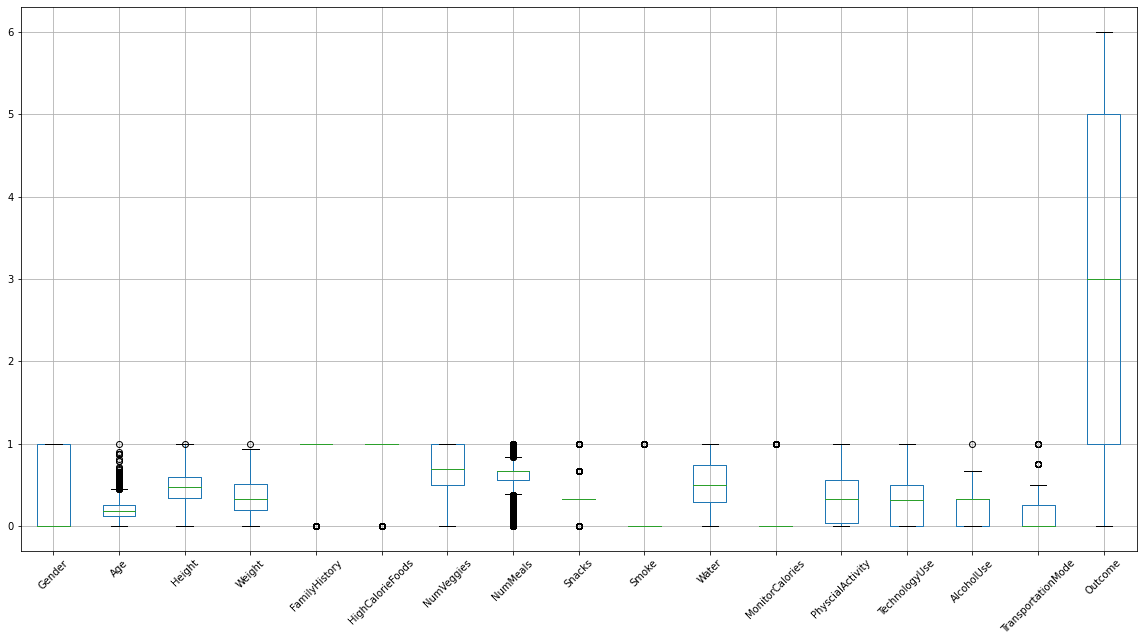

In [28]:
ax = df_normal.boxplot(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

From the box plot I see age and number of meals have quite a few outliers so will have to address this. The other variables aren't concerning so I'll leave for now 

Looking at a correlation to see the correlation of all variables to the outcome variable 

In [29]:
df_normal.corr()

,Gender,Age,Height,Weight,FamilyHistory,HighCalorieFoods,NumVeggies,NumMeals,Snacks,Smoke,Water,MonitorCalories,PhyscialActivity,TechnologyUse,AlcoholUse,TransportationMode,Outcome
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.091543,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.007616,-0.164116,-0.024908
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.567983,0.236170
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129732,0.085768,0.038986
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,-0.046615,0.387643
FamilyHistory,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.065036,0.313667
HighCalorieFoods,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,-0.009102,0.044582
NumVeggies,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,-0.065098,0.018522
NumMeals,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071747,0.059022,-0.092616
Snacks,0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.003556,-0.327295
Smoke,-0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055282,1.000000,-0.031995,0.047731,0.011216,0.017613,0.082471,0.021045,-0.023256


The correlation matrix 
Weight (0.38), family history(0.31), and age (0.23) highest positive correlations 
Snacks (-0.32) and physcial activity (-0.13) have the highest negative correlations 

Looking at a heatmap for a visual representation of how the different variables are correlated to the outcome variable 

<AxesSubplot:>

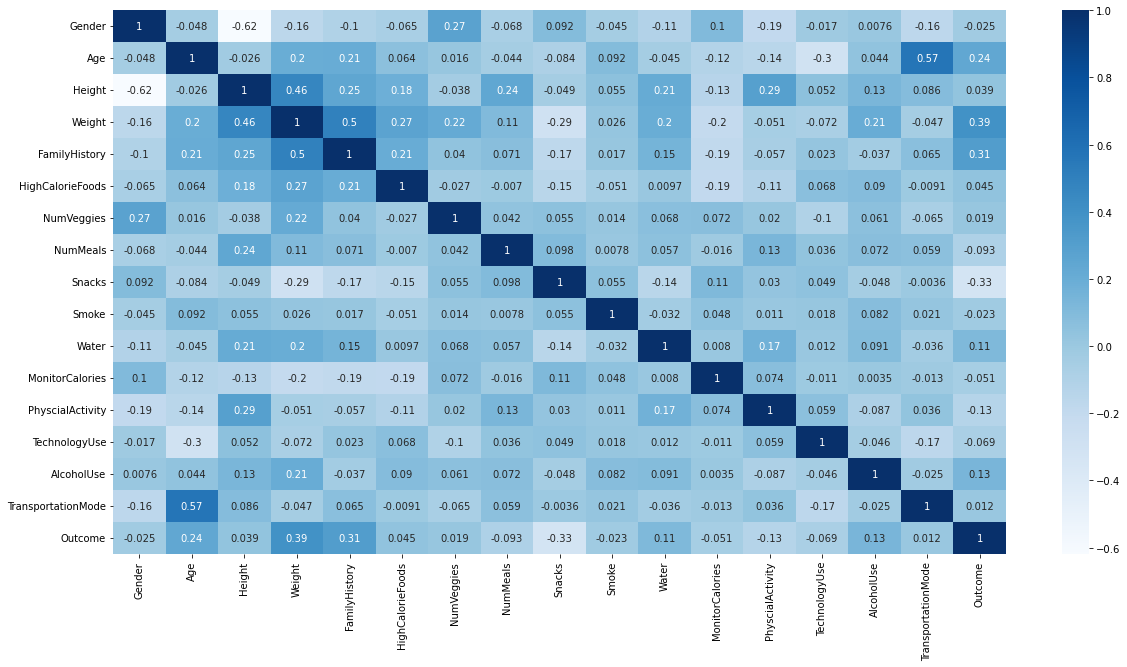

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_normal.corr(), cmap="Blues", annot=True)

Like the correlation matrix, the variables, weight, family history, and age have the highest positive correlations. It also looks like water and alcohol use have a higher correlation to the outcome. A little hard to tell which ones have a negative correlation outside of snacks with ties out with the correlation matrix. 

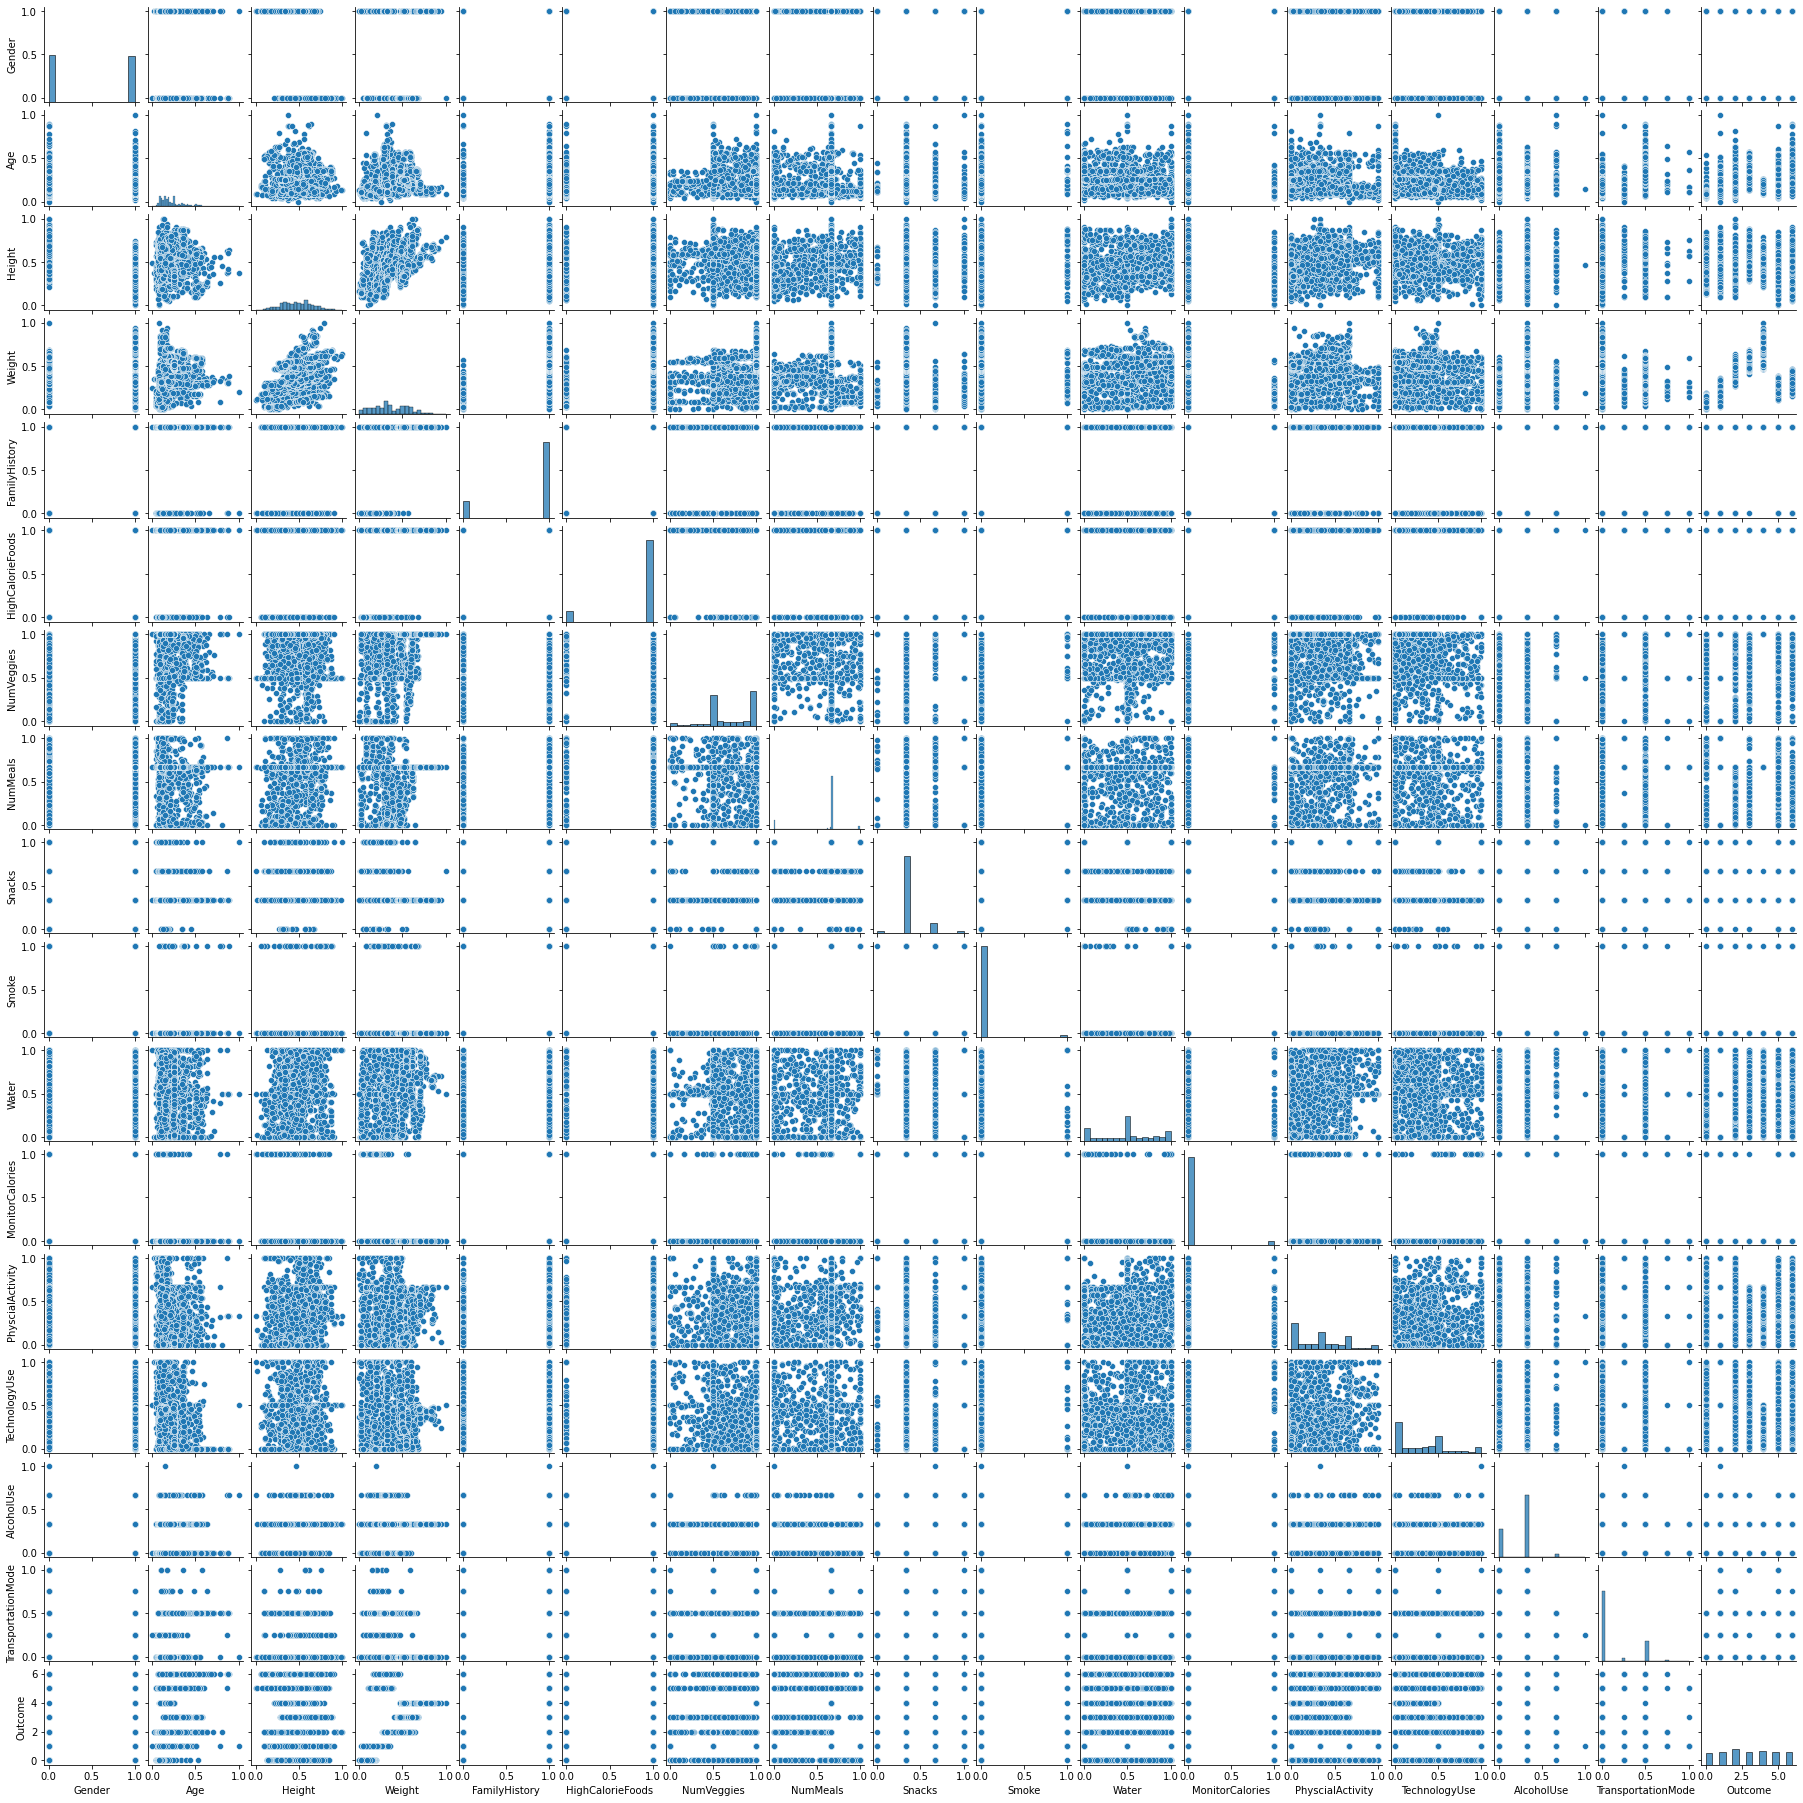

In [31]:
sns.pairplot(df_normal, height = 1.5)

Taking a look at the distribution of the different variables in the data 

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'FamilyHistory'}>,
        <AxesSubplot:title={'center':'HighCalorieFoods'}>,
        <AxesSubplot:title={'center':'NumVeggies'}>,
        <AxesSubplot:title={'center':'NumMeals'}>],
       [<AxesSubplot:title={'center':'Snacks'}>,
        <AxesSubplot:title={'center':'Smoke'}>,
        <AxesSubplot:title={'center':'Water'}>,
        <AxesSubplot:title={'center':'MonitorCalories'}>],
       [<AxesSubplot:title={'center':'PhyscialActivity'}>,
        <AxesSubplot:title={'center':'TechnologyUse'}>,
        <AxesSubplot:title={'center':'AlcoholUse'}>,
        <AxesSubplot:title={'center':'TransportationMode'}>],
       [<AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

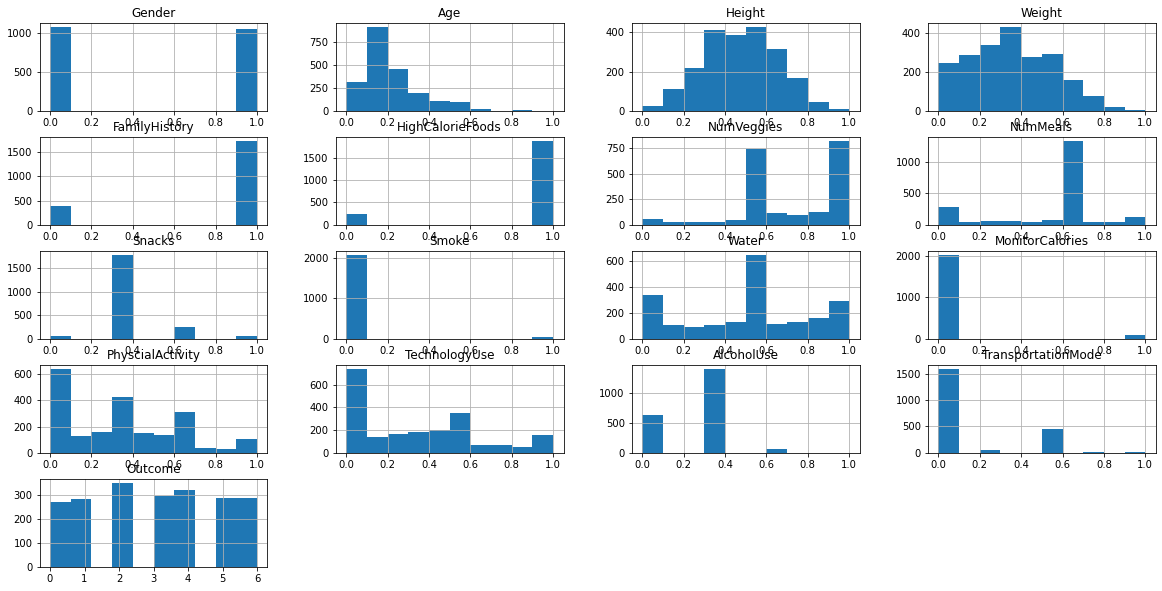

In [32]:
df_normal.hist(figsize=(20, 10))

It looks like gender has an even distribution of male and females. The distribution of age is consistent with what I was seeing with the statistics, where most peope fall into the younger ages so there's a right hand tail. Height has an even distribution, weight is almost evenly distributed with a slight right hand tail. The outcome variable doesn't have an even distribition of the different outcomes so will need to handle that 

Looking at the value counts of the outcome variable to see the differences in numerical counts for each outcome 

In [33]:
df_normal["Outcome"].value_counts()

2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: Outcome, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

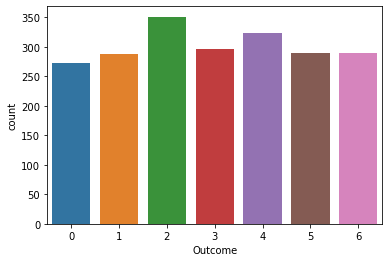

In [34]:
sns.countplot(df_normal['Outcome'])

The numerical counts of the different outcomes aren't that far off from one another but will still want to handle this for a better performance for the machine learning model 

Detecting outliers using interquartile range and removing them for age and number of meals

In [35]:
df_normal.shape

(2111, 17)

In [36]:
column = 'Age'
q1 = df_normal[column].quantile(0.25)
q3 = df_normal[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df_normal[(df_normal[column] < lower_boundary) | (df_normal[column] > upper_boundary)][column]

13      0.574468
21      0.808511
33      0.531915
92      0.872340
104     0.510638
          ...   
1740    0.505646
1775    0.493768
1776    0.512956
1777    0.524350
1778    0.513042
Name: Age, Length: 168, dtype: float64

In [37]:
df_copy = df_normal.copy()
df_copy[column].clip(lower=lower_boundary, upper=upper_boundary, inplace=True)

<AxesSubplot:>

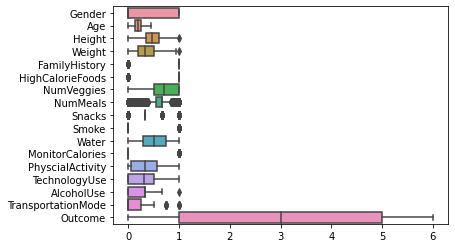

In [38]:
sns.boxplot(data=df_copy, orient='h')

In [39]:
df_copy.shape

(2111, 17)

In [40]:
column = 'NumMeals'
q1 = df_copy[column].quantile(0.25)
q3 = df_copy[column].quantile(0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5 * iqr
lower_boundary = q1 - 1.5 * iqr
df_copy[(df_copy[column] < lower_boundary) | (df_copy[column] > upper_boundary)][column]

4       0.000000
14      0.000000
16      0.000000
17      0.000000
18      1.000000
          ...   
1794    0.380776
1795    0.145986
1796    0.114372
1797    0.071144
1798    0.029683
Name: NumMeals, Length: 579, dtype: float64

In [41]:
df_copy1 = df_copy.copy()
df_copy1[column].clip(lower=lower_boundary, upper=upper_boundary, inplace=True)

<AxesSubplot:>

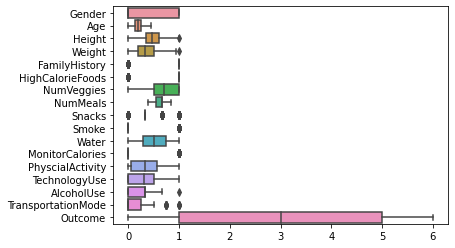

In [42]:
sns.boxplot(data=df_copy1, orient='h')

In [43]:
df_copy1.shape

(2111, 17)

Removing outliers results in removing 168 rows out of 2111 (about 7% of the original data)
https://medium.com/@arsalan_zafar/handling-outliers-in-pandas-5cd872eef508#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImY4MzNlOGE3ZmUzZmU0Yjg3ODk0ODIxOWExNjg0YWZhMzczY2E4NmYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDA2MzExODk2NDA2NTY2ODcxOTkiLCJlbWFpbCI6Im1vaGFtZjIwMTNAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsIm5iZiI6MTY5OTcyNzEyMiwibmFtZSI6IkZhdGhpYSBNb2hhbWVkIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hL0FDZzhvY0pWcDFjUGtZTkw1b2hpMnVqZk5vSDMwNjg5Rjlaa0pRS0Q1N2RMM2hBd0xnPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IkZhdGhpYSIsImZhbWlseV9uYW1lIjoiTW9oYW1lZCIsImxvY2FsZSI6ImVuIiwiaWF0IjoxNjk5NzI3NDIyLCJleHAiOjE2OTk3MzEwMjIsImp0aSI6ImQ4Yzg2YWNkYTM4NWNkZWQ4ODk0Zjc2N2I0MmMxZGIwNzU0N2Y4YjcifQ.K83lMIRdUXEMyP6hmuaT0-IYTAU3gUP5QfBT1zmx71ugjOdMGUIVlJfCW5uwUTLgnH0l1SMKwMgQAN_SIVWcI_qvQZ1PY4bpT0QSo7lWi4PhCZbF6KarG18so5JGsQsf5M-xQcM-3bc_8LRnmYrwiB90ZKkfn0t5lrqImm3KPAXXBmicVZJbi46TWABXp_rWHzdY3FC6RV5DKZKj-09EIG2KyPliHpBH87AoxBVDL9y-i7iKpkNKMGh9MIZTxGubqdDYD3CnppGH3eLhhYrQWIPio8WoIL-t3-WWZ0PyobYvfDffHO2je2KPPC2_WpoUmONNK7ssTaNJsM2talVXZw

[Text(1, 0, 'Gender'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'Height'),
 Text(4, 0, 'Weight'),
 Text(5, 0, 'FamilyHistory'),
 Text(6, 0, 'HighCalorieFoods'),
 Text(7, 0, 'NumVeggies'),
 Text(8, 0, 'NumMeals'),
 Text(9, 0, 'Snacks'),
 Text(10, 0, 'Smoke'),
 Text(11, 0, 'Water'),
 Text(12, 0, 'MonitorCalories'),
 Text(13, 0, 'PhyscialActivity'),
 Text(14, 0, 'TechnologyUse'),
 Text(15, 0, 'AlcoholUse'),
 Text(16, 0, 'TransportationMode'),
 Text(17, 0, 'Outcome')]

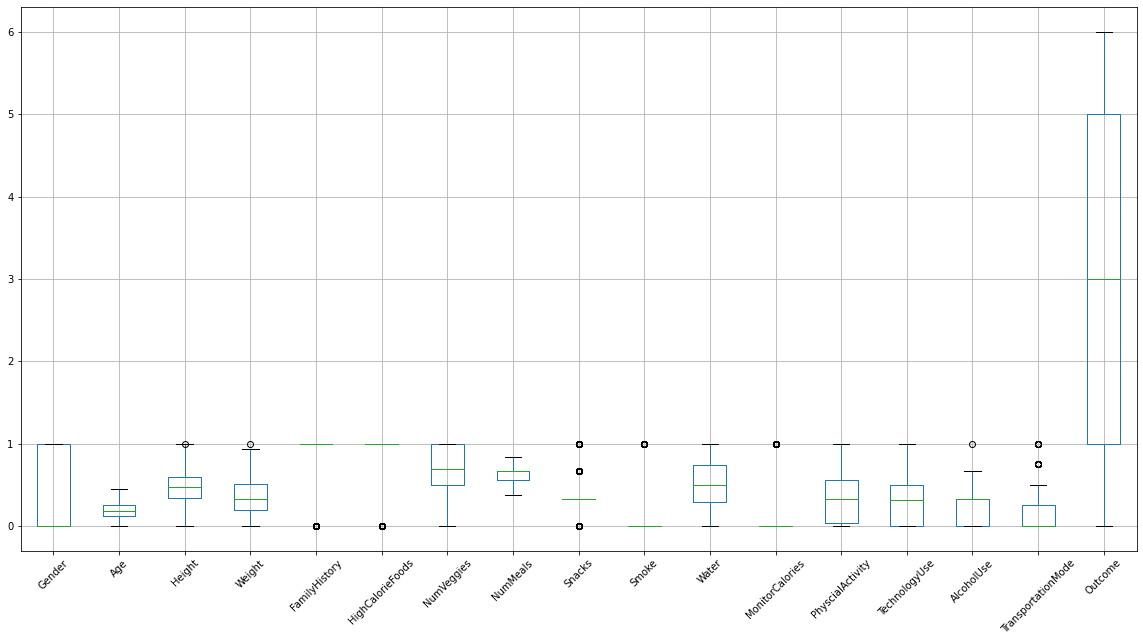

In [44]:
ax = df_copy1.boxplot(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

After handling the outliers, the box plot for the age and num meals variables looks to not have any outliers anymore 

Now to handle the uneven distribution of the outcome variable, there are a few methods to address this. Use SMOTE to address this 
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique

In [45]:
X = df_copy1.drop("Outcome", axis = 1)
y = df_copy1["Outcome"]

In [46]:
X.shape, y.shape

((2111, 16), (2111,))

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_resample, y_resample = SMOTE(random_state=108).fit_resample(X,y)

In [49]:
X_resample.shape, y_resample.shape

((2457, 16), (2457,))

In [50]:
y_resample.value_counts()

1    351
5    351
6    351
2    351
0    351
3    351
4    351
Name: Outcome, dtype: int64

In [51]:
df_final = pd.concat([X_resample, y_resample], axis = 1)

In [52]:
df_final.shape

(2457, 17)

After applying SMOTE to create an even distribution of the outcome, the data set has more rows now which is to be expected since SMOTE is an oversampling method

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

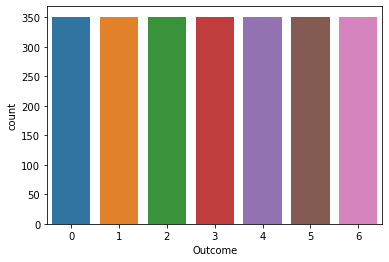

In [53]:
sns.countplot(df_final['Outcome'])

Each outcome has an even distribution 

The data has been cleaning, now applying the K Nearest Neighbor (KNN) algorithm

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Splitting the data into features (X) and target (y)

In [55]:
X = df_final.drop('Outcome', axis = 1)
y = df_final['Outcome']

Splitting the data into training and test sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the features to ensure that all features are on the same scale. This will help in the performance of the machine learning algorithm 
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=679431869993&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9028771&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-na_10-na_11-na-fawnov23&gclid=CjwKCAiA6byqBhAWEiwAnGCA4L_5eitW8BPeaZP-6Gh8rd2bP1ysifplFgMgb0c6cvI6gLHAC2nkXhoCBVIQAvD_BwE

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Fitting and evaluting the model 

In [59]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8699186991869918


In [63]:
cols = df_final.columns
target_col = "Outcome"
feat_cols = [c for c in cols if c != target_col]

In [64]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    KNN = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))

Features: ['Gender', 'Age', 'Height', 'Weight', 'FamilyHistory', 'HighCalorieFoods', 'NumVeggies', 'NumMeals', 'Snacks', 'Smoke', 'Water', 'MonitorCalories', 'PhyscialActivity', 'TechnologyUse', 'AlcoholUse', 'TransportationMode'] 
Target: Outcome
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


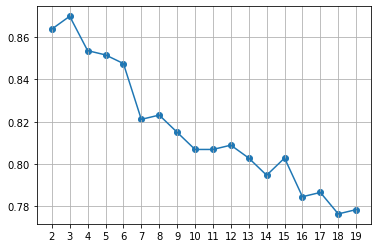

In [65]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ = plt.xticks(range(2, 20))

Since the optimal k value is 3 for the KNN model, don't need to run it again

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics

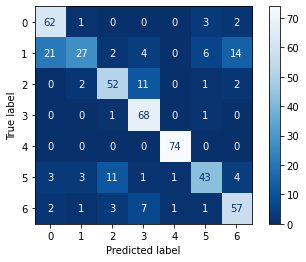

In [67]:
metrics.plot_confusion_matrix(KNN,X_test,y_test,cmap='Blues_r')

Taking a look at feature importance to see if there are any variables not contributing to the outcome so we can remove them
Using the Lasso method - if the feature is irrelevant, Lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [68]:
features = df_final.drop('Outcome', axis = 1)
targets = df_final['Outcome']

In [69]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [70]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.041566
Best score using built-in LassoCV: 0.228847


In [71]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 11 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

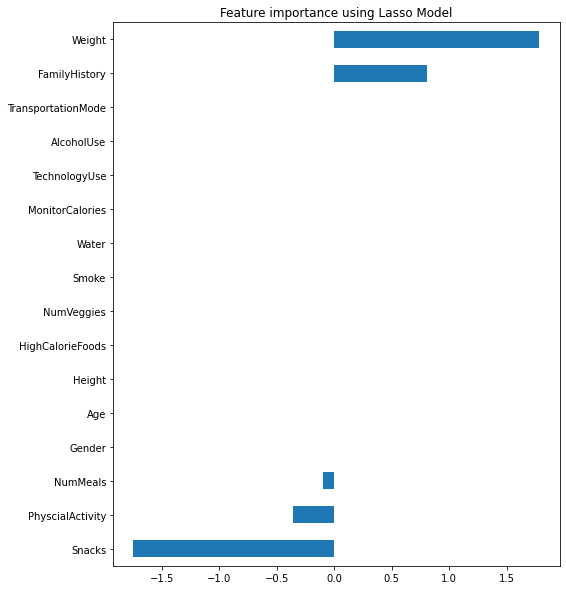

In [72]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [73]:
new_features_KNN = features.drop(['Age', 'Height', 'NumVeggies', 'Water', 'TechnologyUse', 'AlcoholUse', 'TransportationMode', 'Gender', 'HighCalorieFoods', 'MonitorCalories', 'Smoke'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_features_KNN, targets, stratify=targets, random_state=42)

In [74]:
# define and fit our model
KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
KNN.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = KNN.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
1233    2
1455    2
1745    3
1214    2
678     0
       ..
338     5
664     0
145     5
30      5
164     6
Name: Outcome, Length: 615, dtype: int64
Predictions for test data set
[2 2 3 2 0 2 0 0 4 3 0 3 4 2 2 2 2 4 3 6 0 4 2 2 6 5 6 1 2 3 0 6 2 6 0 3 4
 4 6 1 4 1 2 3 0 1 3 2 5 3 2 6 3 0 6 1 0 4 5 1 4 5 2 0 2 3 4 4 0 6 1 5 6 5
 0 5 0 5 2 2 4 4 1 2 5 1 5 3 2 5 5 5 6 2 3 0 2 1 6 1 4 5 4 1 0 6 4 0 6 1 1
 3 0 0 2 2 2 1 5 6 6 2 4 0 6 5 4 3 5 0 3 1 2 6 0 1 4 2 1 2 6 4 2 4 5 4 0 5
 2 6 4 6 1 2 1 6 0 0 4 0 0 0 3 1 1 1 2 5 1 3 2 0 5 1 3 1 1 1 1 0 5 2 3 3 0
 3 4 5 5 1 6 1 4 1 3 3 1 2 0 3 3 0 5 3 2 2 0 2 1 4 6 2 3 6 4 0 1 1 0 1 4 2
 4 3 3 2 3 6 1 6 2 4 4 6 5 5 3 2 5 5 5 3 3 0 5 0 3 5 0 2 2 4 0 2 4 3 2 2 1
 5 4 4 1 1 5 3 1 6 0 3 6 4 3 3 2 2 0 2 6 2 6 0 2 1 4 5 0 0 1 4 0 4 1 5 6 0
 1 5 4 4 0 3 3 1 6 6 1 6 3 0 1 4 3 3 4 4 3 2 1 2 1 4 3 0 4 6 1 2 5 4 3 1 0
 0 0 3 6 1 3 4 5 4 0 6 2 4 3 6 5 4 1 0 6 2 2 4 5 3 4 5 2 2 2 4 5 5 1 0 3 4
 1 5 1 3 0 1 1 3 6 0 1 6 0 0 5 4 2 6 2 6 4 

In [75]:
y_pred = KNN.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7658536585365854


Removing features that weren't considered important to the model actually decreased the accuracy to 79% so I will keep all features since that yielded an accuracy of 87%

The KNN model has a pretty high accuracy of 87% but I'll use Pycaret to see if there are other models that could give a better accuracy 

In [77]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model

In [78]:
from pycaret.classification import *

In [79]:
automl = setup(df_final, target='Outcome', fold_shuffle=True)

,Description,Value
0,session_id,5383
1,Target,Outcome
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6"
4,Original Data,"(2457, 17)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [80]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9750,0.9988,0.9753,0.9765,0.9749,0.9708,0.9711,0.9690
xgboost,Extreme Gradient Boosting,0.9692,0.9989,0.9697,0.9707,0.9690,0.9640,0.9643,0.8940
catboost,CatBoost Classifier,0.9692,0.9988,0.9695,0.9702,0.9691,0.9640,0.9642,5.2950
gbc,Gradient Boosting Classifier,0.9616,0.9980,0.9619,0.9636,0.9614,0.9552,0.9556,0.8560
rf,Random Forest Classifier,0.9546,0.9972,0.9552,0.9578,0.9550,0.9471,0.9475,0.1610
et,Extra Trees Classifier,0.9476,0.9966,0.9483,0.9497,0.9476,0.9389,0.9392,0.1290
dt,Decision Tree Classifier,0.9273,0.9575,0.9275,0.9308,0.9270,0.9151,0.9159,0.0110
lda,Linear Discriminant Analysis,0.8999,0.9897,0.9002,0.9061,0.8998,0.8832,0.8843,0.0110
knn,K Neighbors Classifier,0.7900,0.9451,0.7906,0.7896,0.7825,0.7550,0.7572,0.0220
lr,Logistic Regression,0.7312,0.9407,0.7320,0.7254,0.7220,0.6863,0.6883,0.7510


LightGBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

In [81]:
# To define the input and output feature
x = df_final.drop(['Outcome'],axis=1)
y = df_final.Outcome
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [82]:
import lightgbm as lgb

In [83]:
LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
LGBM.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.128263	valid_0's multi_logloss: 0.215914
[40]	training's multi_logloss: 0.0147018	valid_0's multi_logloss: 0.0958941
[60]	training's multi_logloss: 0.00185703	valid_0's multi_logloss: 0.0864271
[80]	training's multi_logloss: 0.000220313	valid_0's multi_logloss: 0.0939279
[100]	training's multi_logloss: 3.45467e-05	valid_0's multi_logloss: 0.106253


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [84]:
print('Training accuracy {:.4f}'.format(LGBM.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(LGBM.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.9778


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

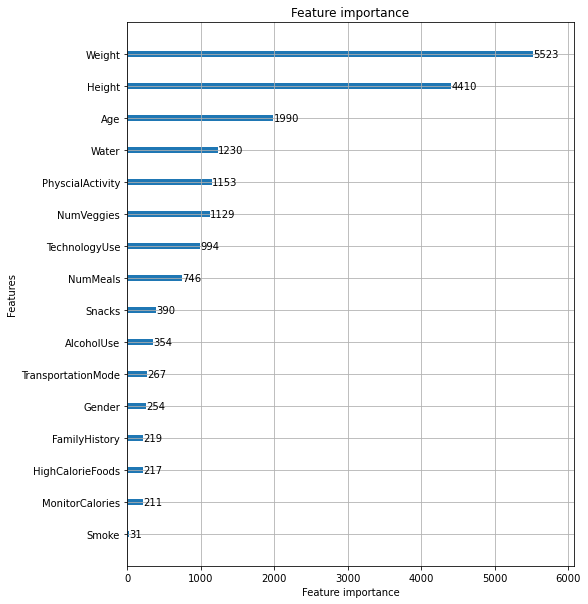

In [85]:
lgb.plot_importance(LGBM)

In [86]:
import sklearn.metrics as metrics

In [87]:
print(metrics.classification_report(y_test,LGBM.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       113
           1       0.96      0.94      0.95       126
           2       0.99      0.98      0.99       110
           3       0.99      0.99      0.99       111
           4       1.00      1.00      1.00       116
           5       0.95      0.98      0.97       114
           6       1.00      0.98      0.99       121

    accuracy                           0.98       811
   macro avg       0.98      0.98      0.98       811
weighted avg       0.98      0.98      0.98       811



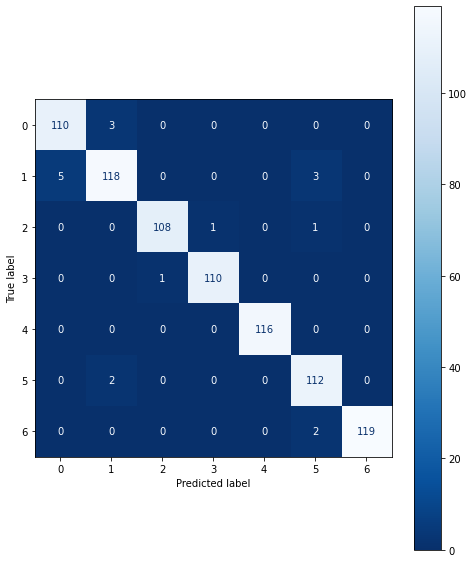

In [88]:
metrics.plot_confusion_matrix(LGBM,x_test,y_test,cmap='Blues_r')

In [89]:
# To define the input and output feature
x = df_final.drop(['Snacks', 'AlcoholUse', 'TransportationMode', 'Gender', 'FamilyHistory', 'HighCalorieFoods', 'MonitorCalories', 'Smoke', 'Outcome'],axis=1)
y = df_final.Outcome
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [90]:
LGBM = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
LGBM.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.132783	valid_0's multi_logloss: 0.234485
[40]	training's multi_logloss: 0.0162196	valid_0's multi_logloss: 0.118736
[60]	training's multi_logloss: 0.00214885	valid_0's multi_logloss: 0.109751
[80]	training's multi_logloss: 0.000290198	valid_0's multi_logloss: 0.120474
[100]	training's multi_logloss: 4.77282e-05	valid_0's multi_logloss: 0.121878


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09, max_depth=-5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [91]:
print('Training accuracy {:.4f}'.format(LGBM.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(LGBM.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.9679


What are the relationships that create the clusters 
what the clusters have in common 

Feature importance

classification - without target, predict the outcome (tpot, pycarat) - autoamting classification 

Another data - as validation run it through the classifier 

data.gov, nih


Code on GitHub - readme


References:
Ali, M. (2021, November). PyCaret Tutorial: A beginner's guide for automating ML workflows using PyCaret. Datacamp. https://www.datacamp.com/tutorial/guide-for-automating-ml-workflows-using-pycaret?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377071&utm_device=c&utm_keywor
Brownlee, J. (2021, January 5). Multi-Class Imbalanced Classification. Machine Learning Mastery. https://machinelearningmastery.com/multi-class-imbalanced-classification/
Data Normalization with Pandas. (n.d.). GeeksforGeeks. https://www.geeksforgeeks.org/data-normalization-with-pandas/
Mondal, A. (2023, August 17). Complete guide on how to Use LightGBM in Python. https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/
Obesity and overweight (2021, June 9). World Health Organization. https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight
Sathpathy, S. (2023, November 17). SMOTE for Imbalanced Classification with Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#h-smote-synthetic-minority-oversampling-technique
Shafi, A. (2023, February). K-Nearest Neighbors (KNN) Classification with scikit-learn. Datacamp. https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377311&utm_device=c&utm_keyword
Shetye, A. (2019, February 10). Feature Selection with sklearn and Pandas. Medium. https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
Zafar, A. (2022, February 15). Handling Outliers in Pandas. Medium. https://medium.com/@arsalan_zafar/handling-outliers-in-pandas-5cd872eef508#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImY4MzNlOGE3ZmUzZmU0Yjg3ODk0ODIxOWExNjg0YWZhMzczY2E4NmYiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJod


Conclusions:
    
The LGBM like Pycaret showed had a better performance compared to the KNN model. LGBM performed with a almost 98% accuracy and the KNN model had an almost 87% accuracy. 